In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 10]


import sys
sys.path.append('../../')
from src.utilities import load_serialized_object, data_path
from src.plot import plot_history

Using TensorFlow backend.


# UIUC

In [2]:
# Training time
models = ['vgg16', 'inceptionv3', 'resnet50']
for model in models:
    time_path = data_path('uiuc', '224_224', 'model', model, 'time.pkl')
    time = load_serialized_object(time_path)
    print('%s:' % model + '{}:{}'.format(*divmod(time, 60)))

vgg16:1:15
inceptionv3:2:9
resnet50:0:23


In [3]:
def plot_history(vgg16_history, resnet50_history, inceptionv3_history):
    plt.rcParams["figure.figsize"] = [15, 8]
    plt.rcParams["font.size"] = 12
    plt.plot(range(1, 1+len(vgg16_history['acc'])), vgg16_history['acc'], label='VGG16 Acc', color='r')
    plt.plot(range(1, 1+len(vgg16_history['val_acc'])), vgg16_history['val_acc'], label='VGG16 Val. Acc', linestyle='--', color='r')
    plt.plot(range(1, 1+len(inceptionv3_history['acc'])), inceptionv3_history['acc'], label='InceptionV3 Acc', color='g')
    plt.plot(range(1, 1+len(inceptionv3_history['val_acc'])), inceptionv3_history['val_acc'], label='InceptionV3 Val. Acc', linestyle='--', color='g')
    plt.plot(range(1, 1+len(resnet50_history['acc'])), resnet50_history['acc'], label='Resnet50 Acc', color='b')
    plt.plot(range(1, 1+len(resnet50_history['val_acc'])), resnet50_history['val_acc'], label='Resnet50 Val. Acc', linestyle='--', color='b')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

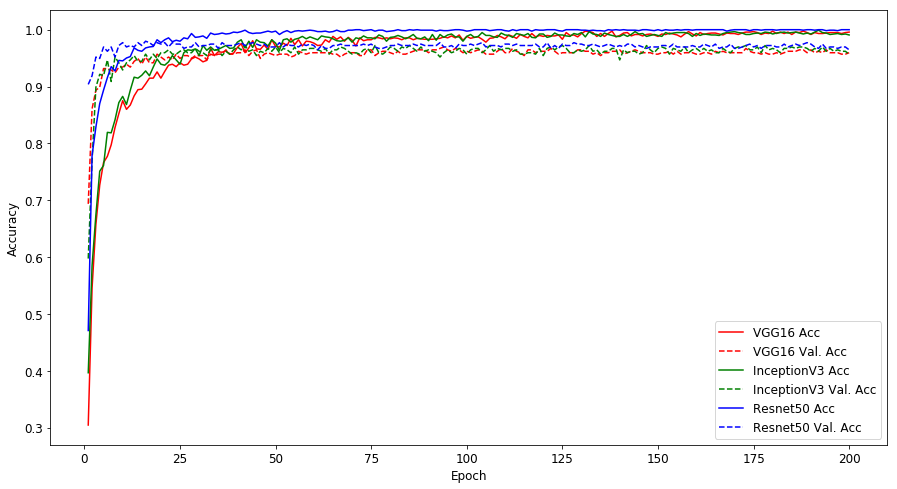

In [4]:
vgg16_history = load_serialized_object(data_path('uiuc', '224_224', 'model', 'vgg16', 'hist.pkl'))
resnet50_history = load_serialized_object(data_path('uiuc', '224_224', 'model', 'resnet50', 'hist.pkl'))
inceptionv3_history = load_serialized_object(data_path('uiuc', '224_224', 'model', 'inceptionv3', 'hist.pkl'))

plot_history(vgg16_history, resnet50_history, inceptionv3_history)

# Kaggle Dog vs Cat

In [5]:
# Training time
models = ['vgg16', 'inceptionv3', 'resnet50']
for model in models:
    time_path = data_path('kaggle_dog_cat', '224_224', 'model', model, 'time.pkl')
    time = load_serialized_object(time_path)
    print('%s:' % model + '{}:{}'.format(*divmod(time, 60)))

vgg16:18:33
inceptionv3:33:9
resnet50:5:37


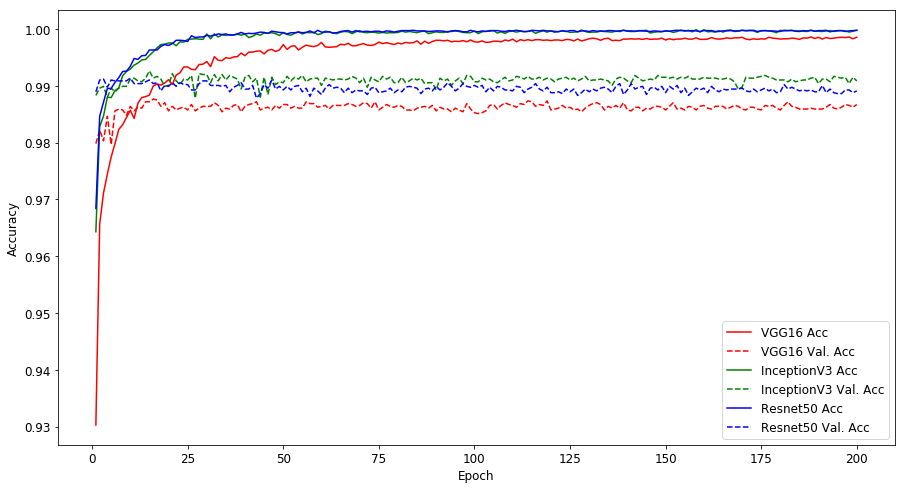

In [6]:
vgg16_history = load_serialized_object(data_path('kaggle_dog_cat', '224_224', 'model', 'vgg16', 'hist.pkl'))
resnet50_history = load_serialized_object(data_path('kaggle_dog_cat', '224_224', 'model', 'resnet50', 'hist.pkl'))
inceptionv3_history = load_serialized_object(data_path('kaggle_dog_cat', '224_224', 'model', 'inceptionv3', 'hist.pkl'))


plot_history(vgg16_history, resnet50_history, inceptionv3_history)

# Codalab Smile

In [7]:
# Training time
models = ['vgg16', 'inceptionv3', 'resnet50']
for model in models:
    time_path = data_path('codalab', '224_224', 'model', 'smile', model, 'time.pkl')
    time = load_serialized_object(time_path)
    print('%s:' % model + '{}:{}'.format(*divmod(time, 60)))

vgg16:6:20
inceptionv3:11:16
resnet50:2:0


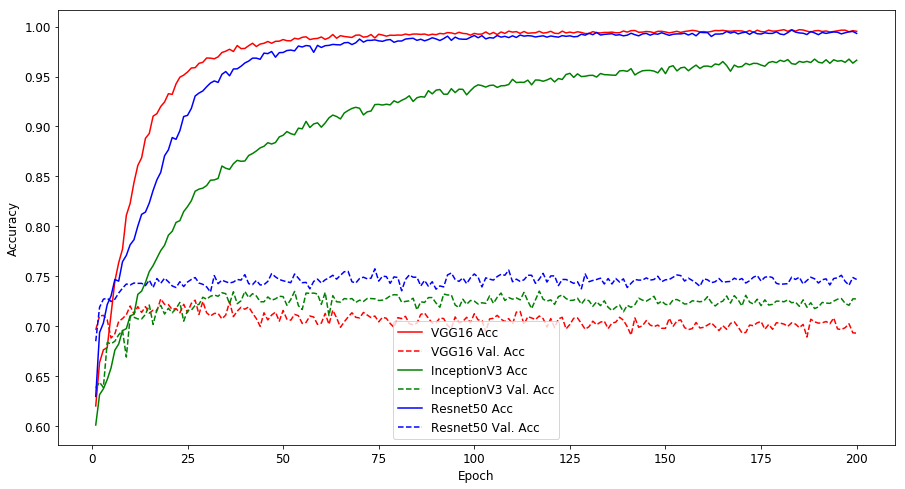

In [8]:
vgg16_history = load_serialized_object(data_path('codalab', '224_224', 'model', 'smile', 'vgg16', 'hist.pkl'))
resnet50_history = load_serialized_object(data_path('codalab', '224_224', 'model', 'smile', 'resnet50', 'hist.pkl'))
inceptionv3_history = load_serialized_object(data_path('codalab', '224_224', 'model', 'smile', 'inceptionv3', 'hist.pkl'))

plot_history(vgg16_history, resnet50_history, inceptionv3_history)

# Codalab Gender

In [9]:
# Training time
models = ['vgg16', 'inceptionv3', 'resnet50']
for model in models:
    time_path = data_path('codalab', '224_224', 'model', 'gender', model, 'time.pkl')
    time = load_serialized_object(time_path)
    print('%s:' % model + '{}:{}'.format(*divmod(time, 60)))

vgg16:6:18
inceptionv3:11:20
resnet50:2:3


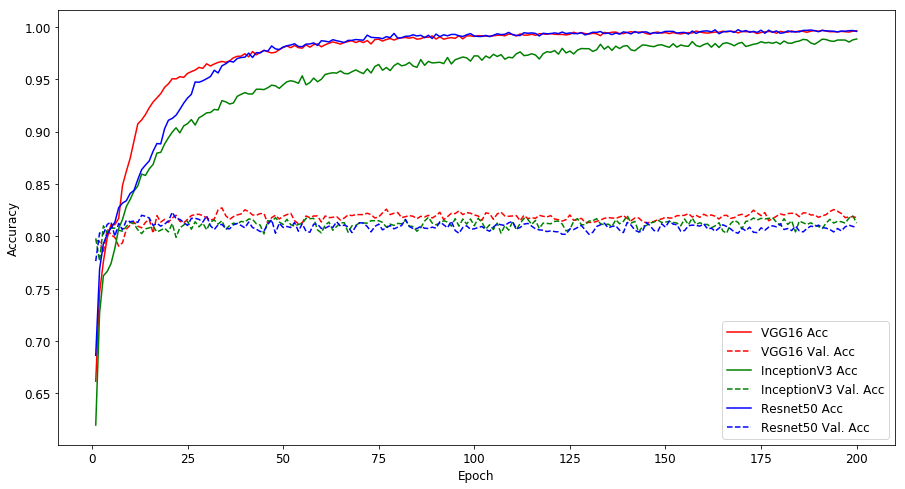

In [10]:
vgg16_history = load_serialized_object(data_path('codalab', '224_224', 'model', 'gender', 'vgg16', 'hist.pkl'))
resnet50_history = load_serialized_object(data_path('codalab', '224_224', 'model', 'gender', 'resnet50', 'hist.pkl'))
inceptionv3_history = load_serialized_object(data_path('codalab', '224_224', 'model', 'gender', 'inceptionv3', 'hist.pkl'))

plot_history(vgg16_history, resnet50_history, inceptionv3_history)

In [11]:
def plot_history(hist_path, metric):
    print(metric)
    hist = load_serialized_object(hist_path)

    plt.plot(range(1, 1+len(hist[metric])), hist[metric], label=metric, color='r')
    plt.plot(range(1, 1+len(hist['val_%s' %  metric])), hist['val_%s' % metric], label='val %s' % metric, linestyle='--', color='b')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

print('GENDER')
ft1_hist_path_gender = data_path('codalab', '224_224', 'model', 'gender', 'vgg16', 'ft','1', 'hist.pkl')
plot_history(ft1_hist_path, 'loss')
plot_history(ft1_hist_path, 'acc')


print('SMILE')
ft1_hist_path_smile = data_path('codalab', '224_224', 'model', 'smile', 'vgg16', 'ft','1', 'hist.pkl')
plot_history(ft1_hist_path, 'loss')
plot_history(ft1_hist_path, 'acc')

GENDER


NameError: name 'ft1_hist_path' is not defined